In [147]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Clustering for dataset exploration

In [93]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state=42)

In [94]:
model = KMeans(n_clusters=3)
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [110]:
labels = model.predict(X_train)
print(labels)

[0 0 2 0 2 0 2 0 1 2 0 1 1 1 0 0 1 1 1 0 1 0 2 1 0 0 1 0 0 0 0 2 0 1 0 2 1
 1 0 2 1 0 1 1 0 0 2 0 2 2 0 1 1 0 2 1 1 1 0 2 1 2 2 1 0 0 0 2 2 1 2 0 2 0
 0 0 1 0 0 1 0 2 2 1 0 2 2 1 2 1 2 2 2 0 2 0 0 0 0 1 0 0 1 0 2]


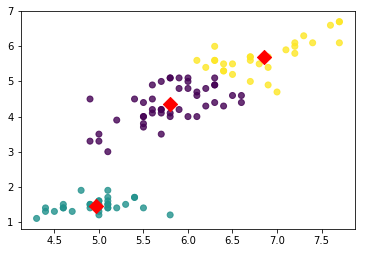

In [125]:
plt.scatter(X_train[:,0:1], X_train[:,2:3],c=labels,alpha=0.8)
plt.scatter(centroids_x, centroids_y, marker='D', s=100, c='red')
plt.show()

In [134]:
df = pd.DataFrame({'labels':labels, 'species':y_train})

In [138]:
ct = pd.crosstab(df['labels'],df['species'])

In [139]:
print(ct)

species   0   1   2
labels             
0         0  34  11
1        31   0   0
2         0   3  26


In [140]:
print(model.inertia_)

56.4717295761


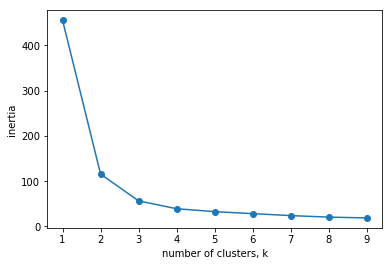

In [144]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [148]:
# transforming features for better clustering (datasets with high variance features)
scaler = StandardScaler()

In [150]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [151]:
X_train_scaled = scaler.transform(X_train)

In [152]:
# two steps: StandardScaler then KMeans using pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)

In [155]:
from sklearn.pipeline import make_pipeline

In [156]:
pipeline = make_pipeline(scaler, kmeans)

In [157]:
pipeline.fit(X_train)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [158]:
labels = pipeline.predict(X_train)

In [159]:
df = pd.DataFrame({'labels':labels, 'species':y_train})

In [160]:
ct = pd.crosstab(df['labels'],df['species'])
print(ct)

species   0   1   2
labels             
0        31   0   0
1         0   3  24
2         0  34  13


In [161]:
from sklearn.preprocessing import Normalizer

In [162]:
# Create a normalizer: normalizer
normalizer = Normalizer()

In [163]:
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(X_train)

Pipeline(steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [164]:
labels = pipeline.predict(X_train)